# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lei_df =pd.read_csv('/content/drive/MyDrive/lei_rating.csv')

In [ ]:
df_cleaned = pd.read_csv('/content/drive/MyDrive/cleaned_sa_data.csv', dtype=str, on_bad_lines='skip')

df_cleaned.head()

In [ ]:
 df_cleaned.shape

(972366, 65)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972366 entries, 0 to 972365
Data columns (total 65 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   activity_year                             972366 non-null  object
 1   lei                                       972366 non-null  object
 2   derived_msa_md                            972366 non-null  object
 3   state_code                                972366 non-null  object
 4   county_code                               968959 non-null  object
 5   census_tract                              958359 non-null  object
 6   conforming_loan_limit                     971442 non-null  object
 7   derived_loan_product_type                 972366 non-null  object
 8   derived_dwelling_category                 972366 non-null  object
 9   derived_ethnicity                         972366 non-null  object
 10  derived_race                    

In [ ]:
lei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lei         4130 non-null   object 
 1   cra_rating  1719 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.7+ KB


In [ ]:
import pandas as pd

# Make sure both keys are the same dtype
df_cleaned['lei'] = df_cleaned['lei'].astype(str)
lei_df['lei']      = lei_df['lei'].astype(str)

# Merge CRA ratings into df_cleaned
df_merged = df_cleaned.merge(
    lei_df[['lei', 'cra_rating']],
    on='lei',
    how='left'
)

print(df_merged[['lei', 'cra_rating']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972366 entries, 0 to 972365
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   lei         972366 non-null  object 
 1   cra_rating  217083 non-null  float64
dtypes: float64(1), object(1)
memory usage: 14.8+ MB
None


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972366 entries, 0 to 972365
Data columns (total 66 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             972366 non-null  object 
 1   lei                                       972366 non-null  object 
 2   derived_msa_md                            972366 non-null  object 
 3   state_code                                972366 non-null  object 
 4   county_code                               968959 non-null  object 
 5   census_tract                              958359 non-null  object 
 6   conforming_loan_limit                     971442 non-null  object 
 7   derived_loan_product_type                 972366 non-null  object 
 8   derived_dwelling_category                 972366 non-null  object 
 9   derived_ethnicity                         972366 non-null  object 
 10  derived_race        

In [ ]:
import numpy as np

df_merged['app_eth'] = df_merged['applicant_ethnicity_1'].astype(str)

# 1st broad
def broad_eth(x):
    if x in {'1','11','12','13','14'}:
        return 'Hispanic or Latino'
    elif x=='2':
        return 'Not Hispanic or Latino'
    elif x=='3':
        return 'Information Not Provided'
    elif x=='4':
        return 'Not Applicable'
    elif x=='5':
        return 'No Co-applicant'
    else:
        return 'Other/Unknown'  # 6,9,10,1111 等

df_merged['ethnicity_ncrc_major'] = df_merged['app_eth'].map(broad_eth)

# 2nd fine
fine_map = {
    '1'  : 'Hispanic or Latino (general)',
    '11' : 'Mexican',
    '12' : 'Puerto Rican',
    '13' : 'Cuban',
    '14' : 'Other Hispanic or Latino',
    '2'  : 'Not Hispanic or Latino',
    '3'  : 'Information Not Provided',
    '4'  : 'Not Applicable',
    '5'  : 'No Co-applicant'
}
df_merged['ethnicity_ncrc_sub'] = df_merged['app_eth'].map(fine_map).fillna('Other/Unknown')

# Check
print(df_merged[['app_eth','ethnicity_ncrc_major','ethnicity_ncrc_sub']]
      .drop_duplicates()
      .sort_values('app_eth'))


       app_eth      ethnicity_ncrc_major            ethnicity_ncrc_sub
6            1        Hispanic or Latino  Hispanic or Latino (general)
60000       10             Other/Unknown                 Other/Unknown
35          11        Hispanic or Latino                       Mexican
60175     1111             Other/Unknown                 Other/Unknown
298         12        Hispanic or Latino                  Puerto Rican
28          13        Hispanic or Latino                         Cuban
50          14        Hispanic or Latino      Other Hispanic or Latino
1            2    Not Hispanic or Latino        Not Hispanic or Latino
0            3  Information Not Provided      Information Not Provided
1836         4            Not Applicable                Not Applicable
140000       5           No Co-applicant               No Co-applicant
61458        6             Other/Unknown                 Other/Unknown
60007        9             Other/Unknown                 Other/Unknown
345   

In [ ]:
import numpy as np

df_merged['app_race'] = df_merged['applicant_race_1'].astype(str)

# 1st broad
def map_race_broad(x):
    if x == '1':
        return 'American Indian or Alaska Native'
    elif x in {'2','21','22','23','24','25','26','27'}:
        return 'Asian'
    elif x == '3':
        return 'Black or African American'
    elif x in {'4','41','42','43','44'}:
        return 'Native Hawaiian or Other Pacific Islander'
    elif x == '5':
        return 'White'
    elif x == '6':
        return 'Information Not Provided'
    elif x == '7':
        return 'Not Applicable'
    elif x == '8':
        return 'No Co-applicant'
    else:
        return 'Other/Unknown'

df_merged['race_ncrc_major'] = df_merged['app_race'].map(map_race_broad)



# 2nd fine
race_fine_map = {
    '1'  : 'American Indian or Alaska Native',
    '2'  : 'Asian(General)',
    '21' : 'Asian Indian',
    '22' : 'Chinese',
    '23' : 'Filipino',
    '24' : 'Japanese',
    '25' : 'Korean',
    '26' : 'Vietnamese',
    '27' : 'Other Asian',
    '3'  : 'Black or African American',
    '4'  : 'Native Hawaiian or Other Pacific Islander(General)',
    '41' : 'Native Hawaiian',
    '42' : 'Guamanian or Chamorro',
    '43' : 'Samoan',
    '44' : 'Other Pacific Islander',
    '5'  : 'White',
    '6'  : 'Information Not Provided',
    '7'  : 'Not Applicable',
    '8'  : 'No Co-applicant'
}

df_merged['race_ncrc_sub'] = df_merged['app_race'].map(race_fine_map).fillna('Other/Unknown')


# check
print(df_merged[['app_race','race_ncrc_major','race_ncrc_sub']]
      .drop_duplicates()
      .sort_values('app_race'))


       app_race                            race_ncrc_major  \
383           1           American Indian or Alaska Native   
6             2                                      Asian   
311          21                                      Asian   
17407        22                                      Asian   
1773         23                                      Asian   
113614       24                                      Asian   
16870        25                                      Asian   
1268         26                                      Asian   
1574         27                                      Asian   
7             3                  Black or African American   
367           4  Native Hawaiian or Other Pacific Islander   
111390       41  Native Hawaiian or Other Pacific Islander   
108121       42  Native Hawaiian or Other Pacific Islander   
104289       43  Native Hawaiian or Other Pacific Islander   
16222        44  Native Hawaiian or Other Pacific Islander   
1       

In [ ]:
print(f'count of missing cra_rating:{df_merged.cra_rating.isna().sum()}')
print(f'count of having cra_rating:{df_merged.cra_rating.notna().sum()}')

count of missing cra_rating:755283
count of having cra_rating:217083


In [ ]:
df_merged.lei.nunique()

347

In [ ]:
# round to nearest integer
df_merged['cra_rating'] = df_merged['cra_rating'] \
                            .round(0) \
                            .astype('Int64')


In [ ]:
# select only rows with a non-null cra_rating
non_null_cra = df_merged[df_merged['cra_rating'].notna()]

# inspect the result
print(non_null_cra.shape)
non_null_cra.head()

(217083, 72)


,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,cra_rating,app_eth,ethnicity_ncrc_major,ethnicity_ncrc_sub,app_race,race_ncrc_major,race_ncrc_sub
13830,2022,549300MU2YI0HXIT3257,45300,FL,12057,12057011010,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,731,1352,31,2,2,Not Hispanic or Latino,Not Hispanic or Latino,5,White,White
13831,2022,549300MU2YI0HXIT3257,45300,FL,12053,12053040101,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1710,2458,33,2,2,Not Hispanic or Latino,Not Hispanic or Latino,5,White,White
13832,2022,549300MU2YI0HXIT3257,35840,FL,12115,12115001304,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,921,1158,44,2,2,Not Hispanic or Latino,Not Hispanic or Latino,5,White,White
13833,2022,549300MU2YI0HXIT3257,27260,FL,12109,12109021207,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,939,1108,28,2,2,Not Hispanic or Latino,Not Hispanic or Latino,5,White,White
13834,2022,549300MU2YI0HXIT3257,0,FL,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,0,0,0,2,2,Not Hispanic or Latino,Not Hispanic or Latino,5,White,White


In [ ]:
have = df_merged['cra_rating'].notna().mean() * 100
print(f"{have:.2f}% have a CRA rating; {100-have:.2f}% do not.")


22.33% have a CRA rating; 77.67% do not.


In [ ]:
# compute normalized value counts (as fractions), convert to percentages, and round
rating_pct = (
    df_merged['cra_rating']
    .value_counts(normalize=True)      # fractions
    .mul(100)                          # to percentages
    .round(2)
)

rating_pct = rating_pct.rename_axis('cra_rating') \
                       .reset_index(name='percentage')

print(rating_pct)

   cra_rating  percentage
0           1       59.41
1           2       40.59


In [ ]:
import pandas as pd

# total number of rows in de_merged
total = len(df_merged)

# Get counts for ratings 1 and 2 (fill 0 if missing)
rating_counts = df_merged['cra_rating'] \
    .value_counts(dropna=False) \
    .reindex([1, 2], fill_value=0)

# Compute percentages for 1 and 2
rating_percentages = (rating_counts / total * 100).round(2)

rating_df = pd.DataFrame({
    'Rating': rating_counts.index,
    'Frequency': rating_counts.values,
    'Percentage': rating_percentages.values
})

# Compute counts/percentage for NaN
nan_count = df_merged['cra_rating'].isna().sum()
nan_percentage = (nan_count / total * 100).round(2)

nan_df = pd.DataFrame({
    'Rating': ['NaN'],
    'Frequency': [nan_count],
    'Percentage': [nan_percentage]
})

# Combine and show only rows for 1, 2, and NaN
result_df = pd.concat([rating_df, nan_df], ignore_index=True)
print(result_df)


  Rating  Frequency  Percentage
0      1     128960       13.26
1      2      88123        9.06
2    NaN     755283       77.67


In [ ]:
import pandas as pd
import plotly.express as px

# Filter to only ratings 1 and 2
df12 = df_merged[df_merged['cra_rating'].notna()]

# Compute mode (most common) rating per state
mode_df = (
    df12
    .groupby(['state_code', 'cra_rating'])
    .size()
    .reset_index(name='count')
    .sort_values(['state_code', 'count'], ascending=[True, False])
    .drop_duplicates(subset=['state_code'])
    .drop(columns='count')
)


# Convert rating to a categorical/string so plotly treats it discretely
mode_df['cra_rating'] = mode_df['cra_rating'].astype(int).astype(str)

# Plot discrete choropleth
fig = px.choropleth(
    mode_df,
    locations='state_code',
    locationmode="USA-states",
    color='cra_rating',
    scope="usa",
    title='Dominant CRA Rating by State'
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


# CRA Effection


In [ ]:
list(df_merged.columns)

['activity_year',
 'lei',
 'derived_msa_md',
 'state_code',
 'county_code',
 'census_tract',
 'conforming_loan_limit',
 'derived_loan_product_type',
 'derived_dwelling_category',
 'derived_ethnicity',
 'derived_race',
 'derived_sex',
 'action_taken',
 'purchaser_type',
 'preapproval',
 'loan_type',
 'loan_purpose',
 'lien_status',
 'reverse_mortgage',
 'open_end_line_of_credit',
 'business_or_commercial_purpose',
 'loan_amount',
 'interest_rate',
 'hoepa_status',
 'total_loan_costs',
 'origination_charges',
 'loan_term',
 'negative_amortization',
 'interest_only_payment',
 'balloon_payment',
 'other_nonamortizing_features',
 'property_value',
 'construction_method',
 'occupancy_type',
 'manufactured_home_secured_property_type',
 'manufactured_home_land_property_interest',
 'total_units',
 'applicant_credit_score_type',
 'co_applicant_credit_score_type',
 'applicant_ethnicity_1',
 'co_applicant_ethnicity_1',
 'applicant_ethnicity_observed',
 'co_applicant_ethnicity_observed',
 'applican

In [ ]:
# Identify the CRA‑rated subset
df_merged_cra_rated = df_merged[df_merged['cra_rating'].notna()].copy()

# Check action_taken codes
print("All action_taken values:", np.sort(df_merged['action_taken'].unique()))
print("Rated action_taken values:", np.sort(df_merged_cra_rated['action_taken'].unique()))

All action_taken values: ['1' '2' '3' '4' '5' '6' '7' '8']
Rated action_taken values: ['1' '2' '3' '4' '5' '6' '7' '8']


In [ ]:
# Create an 'approved' flag (HMDA codes 1 & 2 → approved)
df_merged['approved'] = (
    df_merged['action_taken']
      .astype(int)
      .isin([1, 2])
      .astype(int)
)
print("Approved flag counts:\n", df_merged['approved'].value_counts())


Approved flag counts:
 approved
0    665832
1    306534
Name: count, dtype: int64


In [ ]:
# Create a 'has_cra_rating' flag
df_merged['has_cra_rating'] = df_merged['cra_rating'].notna().astype(int)
print("CRA‑rating flag counts:\n", df_merged['has_cra_rating'].value_counts())

CRA‑rating flag counts:
 has_cra_rating
0    755283
1    217083
Name: count, dtype: int64


In [ ]:
# ==== CRA Approval Rate Comparison ====
cra_group    = df_merged.loc[df_merged['has_cra_rating'] == 1, 'approved']
non_cra_group = df_merged.loc[df_merged['has_cra_rating'] == 0, 'approved']

print(f"CRA‑rated approval rate:     {cra_group.mean():.4f}")
print(f"Non‑CRA‑rated approval rate: {non_cra_group.mean():.4f}")

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(cra_group, non_cra_group, equal_var=False)
print(f"T‑statistic: {t_stat:.4f},  P‑value: {p_val:.4f}")

CRA‑rated approval rate:     0.4067
Non‑CRA‑rated approval rate: 0.2889
T‑statistic: 100.1487,  P‑value: 0.0000


In [ ]:
# Low‑income by tract_to_msa_income_percentage ≤ 50%
df_merged['tract_to_msa_income_pct'] = pd.to_numeric(
    df_merged['tract_to_msa_income_percentage'], errors='coerce'
)
df_merged['low_income'] = (df_merged['tract_to_msa_income_pct'] <= 50)

li = df_merged[df_merged['low_income']]
cra_li = li.loc[li['has_cra_rating']==1, 'approved']
noncra_li = li.loc[li['has_cra_rating']==0, 'approved']

print("Low‑income approval rates:")
print(f" CRA‑rated:     {cra_li.mean():.4f}")
print(f" Non‑CRA‑rated: {noncra_li.mean():.4f}")
t, p = ttest_ind(cra_li, noncra_li, equal_var=False)
print(f" t‑statistic={t:.3f}, p‑value={p:.3g}\n")

Low‑income approval rates:
 CRA‑rated:     0.1589
 Non‑CRA‑rated: 0.2260
 t‑statistic=-22.063, p‑value=1.01e-106



In [ ]:
# Approval rates by derived_race
def by_group(df, col):
    rows = []
    for g in df[col].unique():
        sub = df[df[col]==g]
        cra_sub = sub.loc[sub['has_cra_rating']==1, 'approved']
        nc_sub  = sub.loc[sub['has_cra_rating']==0, 'approved']
        rows.append({
            col: g,
            'CRA_rate':    cra_sub.mean(),
            'NonCRA_rate': nc_sub.mean(),
            'Diff':        cra_sub.mean() - nc_sub.mean()
        })
    return pd.DataFrame(rows).sort_values('Diff', ascending=False)

race_df = by_group(df_merged, 'derived_race')
eth_df  = by_group(df_merged, 'derived_ethnicity')

print("By race:\n", race_df)
print("\nBy ethnicity:\n", eth_df)

By race:
                                 derived_race  CRA_rate  NonCRA_rate      Diff
4                                      Joint  0.514723     0.392861  0.121862
0                         Race Not Available  0.263678     0.163584  0.100093
8                        Free Form Text Only  0.250000     0.181818  0.068182
1                                      White  0.467891     0.402577  0.065315
3                  Black or African American  0.354368     0.296811  0.057556
2                                      Asian  0.425286     0.406199  0.019087
6  Native Hawaiian or Other Pacific Islander  0.307359     0.326282 -0.018922
5                   2 or more minority races  0.276256     0.296262 -0.020006
7           American Indian or Alaska Native  0.248067     0.276799 -0.028732

By ethnicity:
          derived_ethnicity  CRA_rate  NonCRA_rate      Diff
0  Ethnicity Not Available  0.261824     0.158261  0.103563
1   Not Hispanic or Latino  0.462705     0.375800  0.086905
3             

In [ ]:
# Approval rates by ncrc
def by_group(df, col):
    rows = []
    for g in df[col].unique():
        sub = df[df[col]==g]
        cra_sub = sub.loc[sub['has_cra_rating']==1, 'approved']
        nc_sub  = sub.loc[sub['has_cra_rating']==0, 'approved']
        rows.append({
            col: g,
            'CRA_rate':    cra_sub.mean(),
            'NonCRA_rate': nc_sub.mean(),
            'Diff':        cra_sub.mean() - nc_sub.mean()
        })
    return pd.DataFrame(rows).sort_values('Diff', ascending=False)

race_ncrc_df = by_group(df_merged, 'race_ncrc_sub')
eth_ncrc_df  = by_group(df_merged, 'ethnicity_ncrc_sub')

print("By race:\n", race_ncrc_df)
print("\nBy ethnicity:\n", eth_ncrc_df)

By race:
                                         race_ncrc_sub  CRA_rate  NonCRA_rate  \
19                                    No Co-applicant  0.693722     0.283206   
3                           Black or African American  0.366996     0.138473   
8                                       Other/Unknown  0.250000     0.090909   
16                              Guamanian or Chamorro  0.454545     0.357143   
2                                      Asian(General)  0.478985     0.395830   
1                                               White  0.471787     0.445853   
12                             Other Pacific Islander  0.316279     0.298701   
0                            Information Not Provided  0.338278     0.325366   
11                                     Not Applicable  0.101584     0.110033   
6                    American Indian or Alaska Native  0.314857     0.384245   
4                                        Asian Indian  0.391766     0.461538   
10                            

In [ ]:
# Add abs_diff
race_ncrc_df['abs_diff'] = race_ncrc_df['Diff'].abs()

# Largest 8 abs_diff
race_abs_top8 = race_ncrc_df.nlargest(8, 'abs_diff')
print(race_abs_top8[['race_ncrc_sub','Diff']])


                                        race_ncrc_sub      Diff
17                                    Native Hawaiian -0.589286
19                                    No Co-applicant  0.410516
15                                             Samoan -0.257143
3                           Black or African American  0.228523
18                                           Japanese -0.196796
13                                             Korean -0.173077
5   Native Hawaiian or Other Pacific Islander(Gene... -0.161211
8                                       Other/Unknown  0.159091


In [ ]:
# abs_diff
eth_ncrc_df['abs_diff'] = eth_ncrc_df['Diff'].abs()

# abs largest diff
eth_abs_top8 = eth_ncrc_df.nlargest(8, 'abs_diff')
print(eth_abs_top8[['ethnicity_ncrc_sub','Diff']])


         ethnicity_ncrc_sub      Diff
9           No Co-applicant  0.410516
7             Other/Unknown  0.404603
3                     Cuban -0.201906
6              Puerto Rican -0.149075
5  Other Hispanic or Latino -0.146093
4                   Mexican -0.116011
8            Not Applicable -0.083196
0  Information Not Provided  0.066188


<ipython-input-30-6c7e8b013b07>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




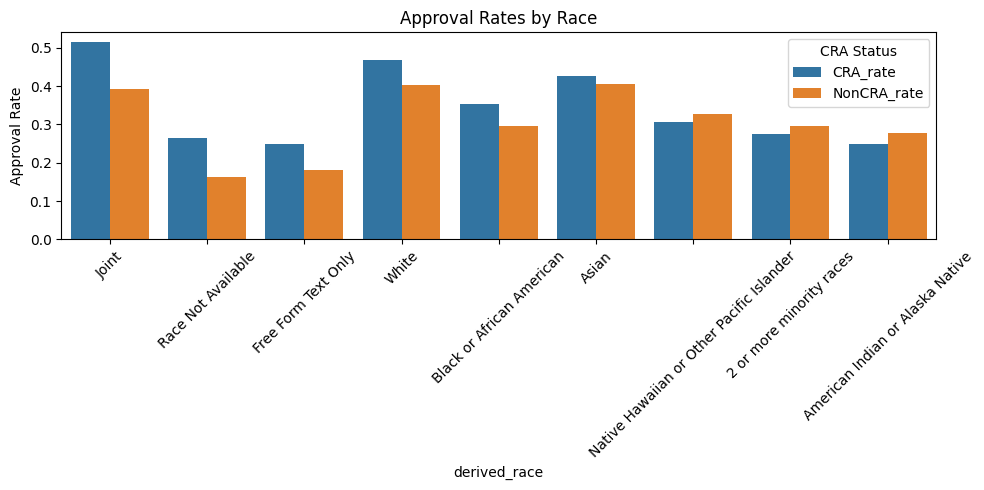

<ipython-input-30-6c7e8b013b07>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




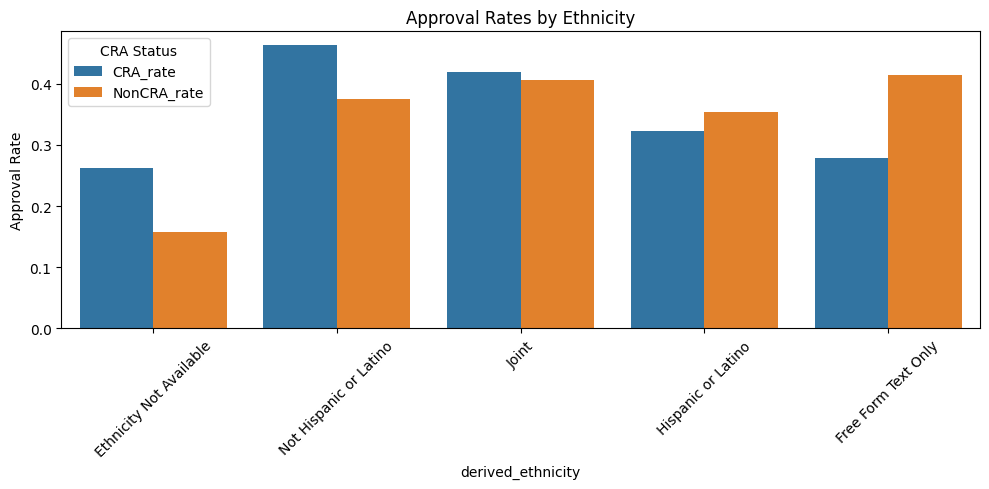

In [ ]:
# Plotting
def plot_group(df, cat, title):
    m = df.melt(id_vars=[cat],
                value_vars=['CRA_rate','NonCRA_rate'],
                var_name='CRA Status',
                value_name='Approval Rate')
    plt.figure(figsize=(10,5))
    sns.barplot(x=cat, y='Approval Rate', hue='CRA Status', data=m, ci=None)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_group(race_df, 'derived_race', 'Approval Rates by Race')
plot_group(eth_df,  'derived_ethnicity', 'Approval Rates by Ethnicity')

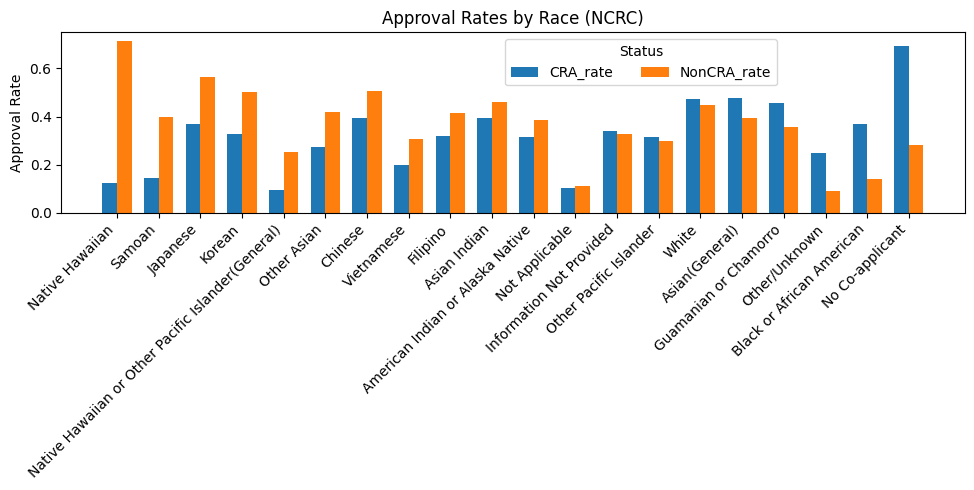

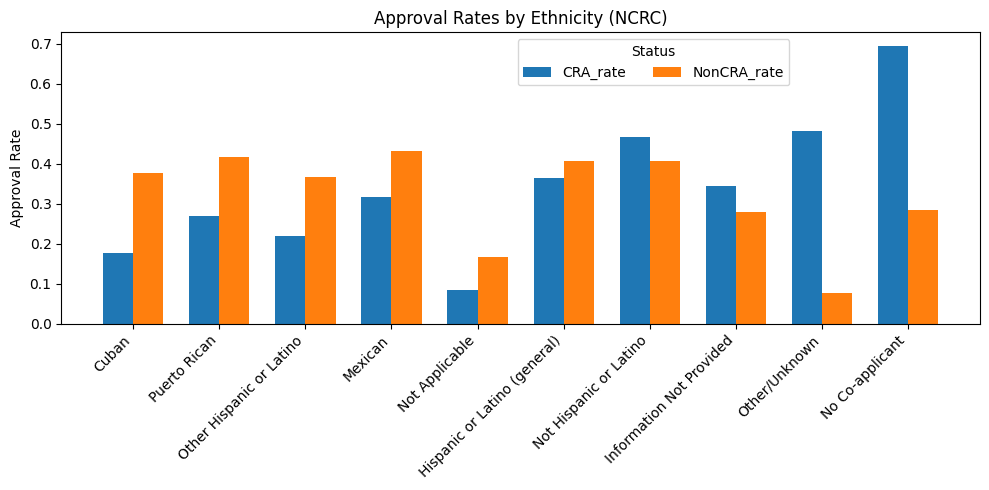

In [ ]:
# NCRC plot
import matplotlib.pyplot as plt

def plot_group(df, cat, title,ascending=False):
    # Melt to long format
    m = df.melt(
        id_vars=[cat],
        value_vars=['CRA_rate', 'NonCRA_rate'],
        var_name='CRA Status',
        value_name='Approval Rate'
    )
    # Pivot for bar positioning
    pivot = m.pivot(index=cat, columns='CRA Status', values='Approval Rate')
    pivot['Diff'] = pivot['NonCRA_rate'] - pivot['CRA_rate']
    pivot = pivot.sort_values('Diff', ascending=ascending)
    x = list(range(len(pivot)))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    # CRA bars
    ax.bar([xi - width/2 for xi in x], pivot['CRA_rate'], width, label='CRA_rate')
    # Non-CRA bars
    ax.bar([xi + width/2 for xi in x], pivot['NonCRA_rate'], width, label='NonCRA_rate')

    # Formatting
    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index, rotation=45, ha='right')
    ax.set_title(title)
    ax.set_ylabel('Approval Rate')
    ax.legend(
        title='Status',
        loc='upper right',
        bbox_to_anchor=(0.8, 1),
        ncol=2,
    )
    plt.tight_layout()
    plt.show()

plot_group(race_ncrc_df, 'race_ncrc_sub', 'Approval Rates by Race (NCRC)')
plot_group(eth_ncrc_df,  'ethnicity_ncrc_sub', 'Approval Rates by Ethnicity (NCRC)')


In [ ]:
def plot_dot_diff(df, cat, title, highlight_groups=None):
    df = df[~df[cat].isin(["Information Not Provided", "Not Applicable",'No Co-applicant','Other/Unknown'])].copy()

    df['Diff'] = df['CRA_rate'] - df['NonCRA_rate']
    df = df.sort_values('Diff')
    colors = ['gray' if (highlight_groups is None or x not in highlight_groups) else 'red' for x in df[cat]]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hlines(y=df[cat], xmin=0, xmax=df['Diff'], color='lightgray', linewidth=1)
    ax.scatter(df['Diff'], df[cat], color=colors, s=60, zorder=3)


    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    ax.set_xlabel("Approval Rate Difference: CRA – NonCRA (positive means CRA is better)", fontsize=11)
    ax.set_title(title, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
print(race_ncrc_df.columns.tolist())


['race_ncrc_sub', 'CRA_rate', 'NonCRA_rate', 'Diff']


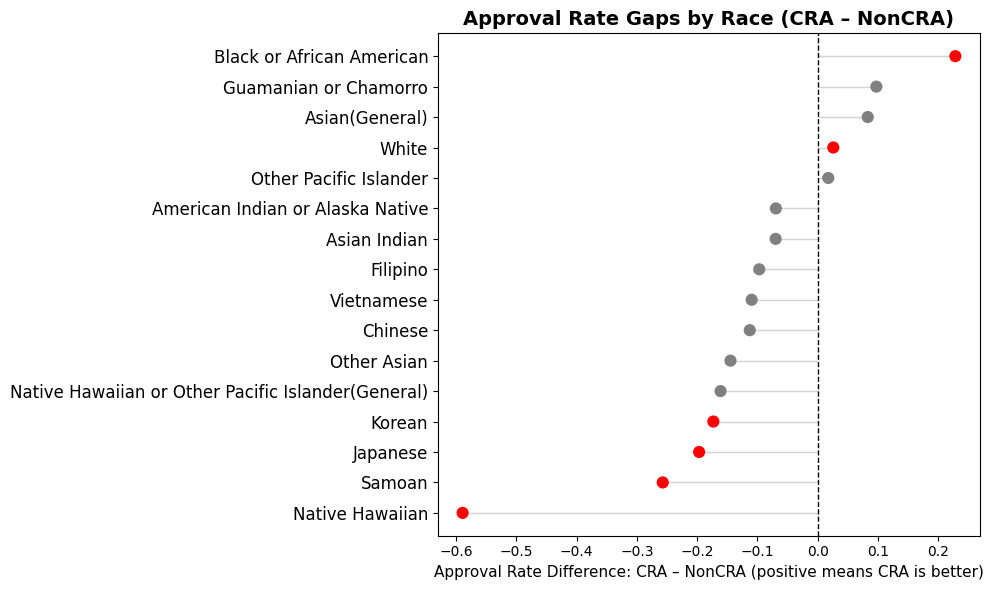

In [ ]:
highlighted = ['Native Hawaiian','Samoan', 'Black or African American', 'White','Japanese', 'Korean']
plot_dot_diff(race_ncrc_df.copy(), 'race_ncrc_sub', 'Approval Rate Gaps by Race (CRA – NonCRA)', highlight_groups=highlighted)


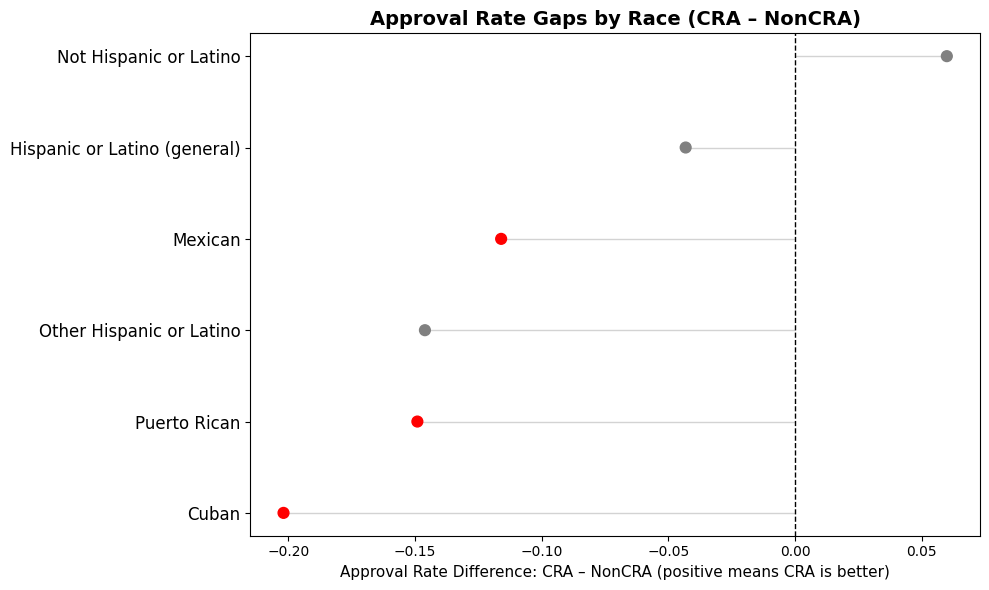

In [ ]:
highlighted = ['Mexican','Puerto Rican','Cuban']
plot_dot_diff(eth_ncrc_df.copy(), 'ethnicity_ncrc_sub', 'Approval Rate Gaps by Race (CRA – NonCRA)', highlight_groups=highlighted)


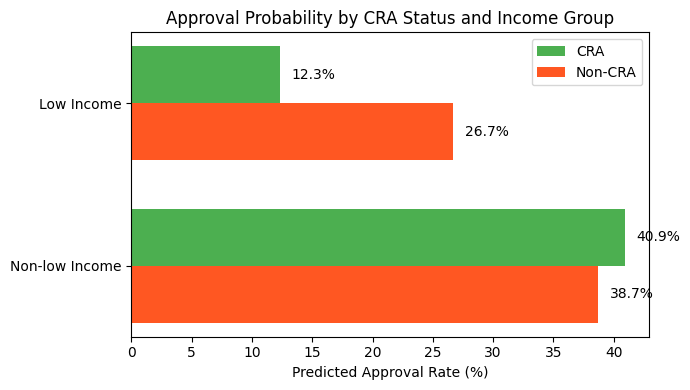

In [ ]:
import matplotlib.pyplot as plt

labels = ['Non-low Income', 'Low Income']
cra_vals = [40.9, 12.3]
noncra_vals = [38.7, 26.7]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 4))
ax.barh([p + width/2 for p in x], cra_vals, width, label='CRA', color='#4CAF50')
ax.barh([p - width/2 for p in x], noncra_vals, width, label='Non-CRA', color='#FF5722')

for i, (c, nc) in enumerate(zip(cra_vals, noncra_vals)):
    ax.text(c + 1, i + width/2, f'{c:.1f}%', va='center')
    ax.text(nc + 1, i - width/2, f'{nc:.1f}%', va='center')

ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted Approval Rate (%)')
ax.set_title('Approval Probability by CRA Status and Income Group')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Approval rates by ncrc
def by_group(df, col):
    rows = []
    for g in df[col].unique():
        sub = df[df[col]==g]
        cra_sub = sub.loc[sub['has_cra_rating']==1, 'approved']
        nc_sub  = sub.loc[sub['has_cra_rating']==0, 'approved']
        rows.append({
            col: g,
            'CRA_rate':    cra_sub.mean(),
            'NonCRA_rate': nc_sub.mean(),
            'Diff':        cra_sub.mean() - nc_sub.mean()
        })
    return pd.DataFrame(rows).sort_values('Diff', ascending=False)

race_ncrc_df = by_group(df_merged, 'race_ncrc_major')
eth_ncrc_df  = by_group(df_merged, 'ethnicity_ncrc_major')

print("By race:\n", race_ncrc_df)
print("\nBy ethnicity:\n", eth_ncrc_df)

By race:
                              race_ncrc_major  CRA_rate  NonCRA_rate      Diff
8                            No Co-applicant  0.693722     0.283206  0.410516
3                  Black or African American  0.366996     0.138473  0.228523
6                              Other/Unknown  0.250000     0.090909  0.159091
2                                      Asian  0.452511     0.396366  0.056145
1                                      White  0.471787     0.445853  0.025934
0                   Information Not Provided  0.338278     0.325366  0.012912
7                             Not Applicable  0.101584     0.110033 -0.008449
5           American Indian or Alaska Native  0.314857     0.384245 -0.069388
4  Native Hawaiian or Other Pacific Islander  0.097547     0.253994 -0.156447

By ethnicity:
        ethnicity_ncrc_major  CRA_rate  NonCRA_rate      Diff
5           No Co-applicant  0.693722     0.283206  0.410516
3             Other/Unknown  0.482280     0.077678  0.404603
0  Informat

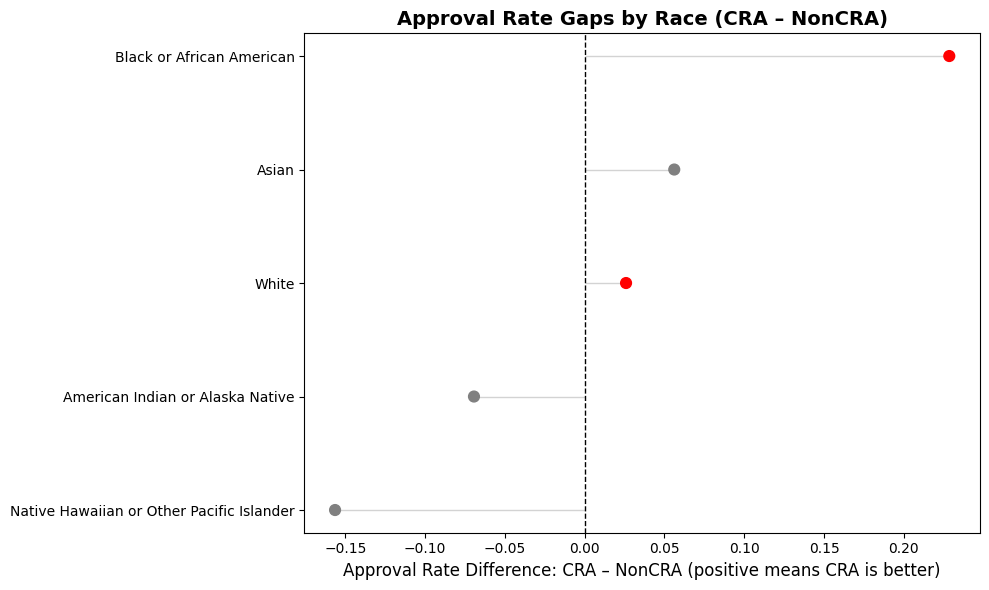

In [ ]:
highlighted = ['Native Hawaiian','Samoan', 'Black or African American', 'White','Japanese', 'Korean']
plot_dot_diff(race_ncrc_df.copy(), 'race_ncrc_major', 'Approval Rate Gaps by Race (CRA – NonCRA)', highlight_groups=highlighted)


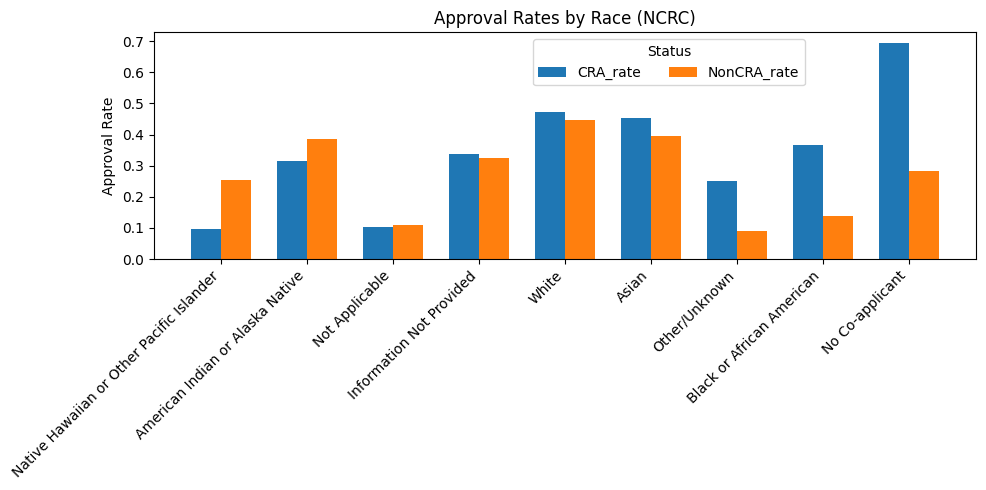

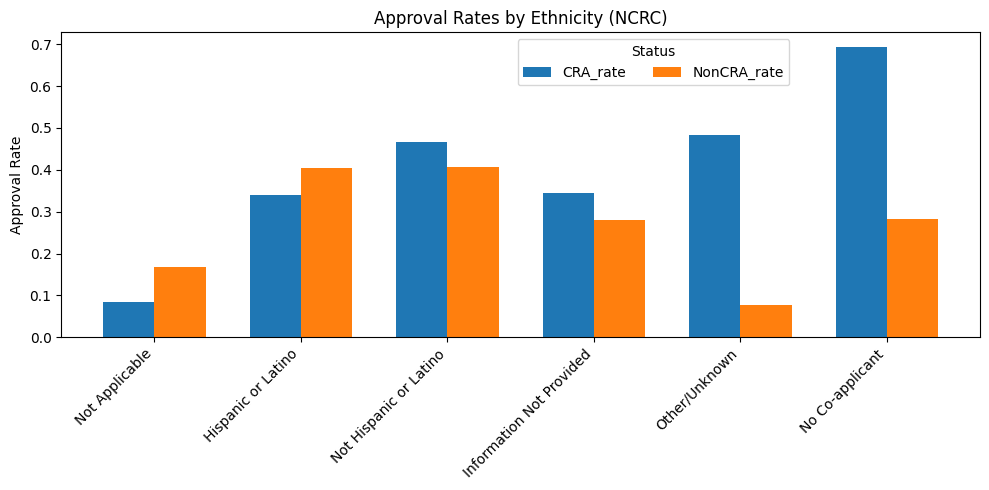

In [ ]:
# NCRC plot
import matplotlib.pyplot as plt

def plot_group(df, cat, title,ascending=False):
    # Melt to long format
    m = df.melt(
        id_vars=[cat],
        value_vars=['CRA_rate', 'NonCRA_rate'],
        var_name='CRA Status',
        value_name='Approval Rate'
    )
    # Pivot for bar positioning
    pivot = m.pivot(index=cat, columns='CRA Status', values='Approval Rate')
    pivot['Diff'] = pivot['NonCRA_rate'] - pivot['CRA_rate']
    pivot = pivot.sort_values('Diff', ascending=ascending)
    x = list(range(len(pivot)))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    # CRA bars
    ax.bar([xi - width/2 for xi in x], pivot['CRA_rate'], width, label='CRA_rate')
    # Non-CRA bars
    ax.bar([xi + width/2 for xi in x], pivot['NonCRA_rate'], width, label='NonCRA_rate')

    # Formatting
    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index, rotation=45, ha='right')
    ax.set_title(title)
    ax.set_ylabel('Approval Rate')
    ax.legend(
        title='Status',
        loc='upper right',
        bbox_to_anchor=(0.8, 1),
        ncol=2,
    )
    plt.tight_layout()
    plt.show()

plot_group(race_ncrc_df, 'race_ncrc_major', 'Approval Rates by Race (NCRC)')
plot_group(eth_ncrc_df,  'ethnicity_ncrc_major', 'Approval Rates by Ethnicity (NCRC)')


# Target 1: regression


In [ ]:
# Prepare data for regression ===
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

df_model = df_merged[[
    'approved',
    'has_cra_rating',
    'tract_to_msa_income_pct',
    'loan_amount',
    'loan_term',
    'open_end_line_of_credit',
    'balloon_payment',
    'interest_only_payment',
    'applicant_sex',
    'race_ncrc_sub',
    'loan_type',
    'loan_purpose',
    'derived_msa_md'
]].copy()

# convert numeric fields
for col in ['tract_to_msa_income_pct', 'loan_amount', 'loan_term']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# safely binarize the HMDA feature flags (1 → 1, anything else → 0)
for col in ['open_end_line_of_credit', 'balloon_payment', 'interest_only_payment']:
    df_model[col] = (
        pd.to_numeric(df_model[col], errors='coerce')  # turn strings to floats/NaN
          .fillna(2)                                  # treat missing as “not‐1”
          .astype(int)
          .map({1: 1, 2: 0})
    )

# categories
for col in ['applicant_sex','race_ncrc_sub','loan_type','loan_purpose','derived_msa_md']:
    df_model[col] = df_model[col].astype('category')

# drop any rows still missing a crucial field
df_model = df_model.dropna(subset=[
    'approved','has_cra_rating','tract_to_msa_income_pct',
    'loan_amount','loan_term'
])

# define low_income & interaction
df_model['low_income']    = (df_model['tract_to_msa_income_pct'] <= 50).astype(int)
df_model['cra_low_income']= df_model['has_cra_rating'] * df_model['low_income']


<ipython-input-35-6655df61a8a5>:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-6655df61a8a5>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# design matrix
y, X = dmatrices(
    'approved ~ has_cra_rating + low_income + cra_low_income'
    ' + loan_amount + loan_term'
    ' + C(open_end_line_of_credit) + C(balloon_payment) + C(interest_only_payment)'
    ' + C(applicant_sex) + C(race_ncrc_sub)'
    ' + C(loan_type) + C(loan_purpose) + C(derived_msa_md)',
    data=df_model, return_type='dataframe'
)

In [ ]:
print(X.shape)

(932185, 9)


In [ ]:
# Check Multicollinearity
formula_vif = (
    'approved ~ has_cra_rating + low_income + cra_low_income'
    ' + loan_amount + loan_term'
    ' + C(applicant_sex) + C(loan_type)'
    ' -1'
)
y, X = dmatrices(formula_vif, data=df_model, return_type='dataframe')

from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in tqdm(range(X.shape[1]))]


100%|██████████| 14/14 [00:25<00:00,  1.79s/it]


In [ ]:
print(vif_df)

               Variable       VIF
0   C(applicant_sex)[1]  1.546020
1   C(applicant_sex)[2]  1.562408
2   C(applicant_sex)[3]  1.448482
3   C(applicant_sex)[4]  1.719798
4   C(applicant_sex)[5]  1.054961
5   C(applicant_sex)[6]  1.000604
6     C(loan_type)[T.2]  1.122928
7     C(loan_type)[T.3]  1.119449
8     C(loan_type)[T.4]  1.010494
9        has_cra_rating  1.272905
10           low_income  1.345878
11       cra_low_income  1.216319
12          loan_amount  1.008255
13            loan_term  1.220338


In [ ]:
# Logit based all sample
formula = (
    'approved ~ has_cra_rating + low_income + cra_low_income'
    ' + loan_amount + loan_term'
    ' + C(open_end_line_of_credit) + C(balloon_payment) + C(interest_only_payment)'
    ' + C(applicant_sex) + C(race_ncrc_sub)'
    ' + C(loan_type) + C(loan_purpose) + C(derived_msa_md)'
)
logit_model = smf.logit(formula=formula, data=df_model).fit(disp=False)
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:               approved   No. Observations:               582209
Model:                          Logit   Df Residuals:                   582080
Method:                           MLE   Df Model:                          128
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.1443
Time:                        20:21:31   Log-Likelihood:            -2.6036e+05
converged:                       True   LL-Null:                   -3.0427e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 -2.9484      0.1

In [ ]:
df_cra = df_model[df_model['has_cra_rating'] == 1].copy()
df_noncra = df_model[df_model['has_cra_rating'] == 0].copy()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# select only the columns you need
df_cra = df_cra[[
    'approved',
    'has_cra_rating',
    'tract_to_msa_income_pct',
    'loan_amount',
    'loan_term',
    'open_end_line_of_credit',
    'balloon_payment',
    'interest_only_payment',
    'applicant_sex',
    'race_ncrc_sub',
    'loan_type',
    'loan_purpose',
    'derived_msa_md'
]].copy()

# convert numeric fields
for col in ['tract_to_msa_income_pct', 'loan_amount', 'loan_term']:
    df_cra[col] = pd.to_numeric(df_cra[col], errors='coerce')

# safely binarize the HMDA feature flags (1 → 1, anything else → 0)
for col in ['open_end_line_of_credit', 'balloon_payment', 'interest_only_payment']:
    df_cra[col] = (
        pd.to_numeric(df_cra[col], errors='coerce')  # turn strings to floats/NaN
          .fillna(2)                                  # treat missing as “not‐1”
          .astype(int)                                # now integers 1 or 2
          .map({1: 1, 2: 0})                          # 1→1, 2→0
    )

# categories
for col in ['applicant_sex','race_ncrc_sub','loan_type','loan_purpose','derived_msa_md']:
    df_cra[col] = df_cra[col].astype('category')

# drop any rows still missing a crucial field
df_cra = df_cra.dropna(subset=[
    'approved','has_cra_rating','tract_to_msa_income_pct',
    'loan_amount','loan_term'
])

# define low_income & interaction
df_cra['low_income']    = (df_cra['tract_to_msa_income_pct'] <= 50).astype(int)
df_cra['cra_low_income']= df_cra['has_cra_rating'] * df_cra['low_income']


In [ ]:
for col in df_cra.columns:
    if df_cra[col].nunique() <= 1:
        print(f"Constant column: {col}")


⚠️ Constant column: has_cra_rating


In [ ]:
df_cra.nunique()

,0
approved,2
has_cra_rating,1
tract_to_msa_income_pct,2413
loan_amount,506
loan_term,129
open_end_line_of_credit,2
balloon_payment,2
interest_only_payment,2
applicant_sex,6
race_ncrc_sub,20


In [ ]:
# logit based on cra group
test_formula = 'approved ~ low_income + loan_amount + loan_term + C(race_ncrc_sub) + C(loan_type)'
logit_model_test = smf.logit(formula=test_formula, data=df_cra).fit()
print(logit_model_test.summary())

Optimization terminated successfully.
         Current function value: 0.605169
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               approved   No. Observations:               216506
Model:                          Logit   Df Residuals:                   216480
Method:                           MLE   Df Model:                           25
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.1041
Time:                        20:39:06   Log-Likelihood:            -1.3102e+05
converged:                       True   LL-Null:                   -1.4624e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# logit based on non-cra
test_formula = 'approved ~ low_income + loan_amount + loan_term + C(race_ncrc_sub) + C(loan_type)'
logit_model_test = smf.logit(formula=test_formula, data=df_noncra).fit()
print(logit_model_test.summary())

Optimization terminated successfully.
         Current function value: 0.569597
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               approved   No. Observations:               715679
Model:                          Logit   Df Residuals:                   715653
Method:                           MLE   Df Model:                           25
Date:                Tue, 06 May 2025   Pseudo R-squ.:                 0.06809
Time:                        20:39:39   Log-Likelihood:            -4.0765e+05
converged:                       True   LL-Null:                   -4.3743e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# different model
import statsmodels.formula.api as smf

# Stepwise model comparison
model_formulas = {
    "Model 1": 'approved ~ C(race_ncrc_sub) + has_cra_rating',
    "Model 2": 'approved ~ C(race_ncrc_sub) + has_cra_rating + loan_amount + loan_term + low_income',
}

# Run and store models
models = {}
for name, formula in model_formulas.items():
    model = smf.logit(formula=formula, data=df_model).fit(disp=False)
    print(f"\n===== {name} =====")
    print(model.summary())
    models[name] = model



===== Model 1 =====
                           Logit Regression Results                           
Dep. Variable:               approved   No. Observations:               932185
Model:                          Logit   Df Residuals:                   932164
Method:                           MLE   Df Model:                           20
Date:                Tue, 06 May 2025   Pseudo R-squ.:                 0.05619
Time:                        03:08:51   Log-Likelihood:            -5.5478e+05
converged:                       True   LL-Null:                   -5.8781e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            

In [ ]:
df_2021_black = df_model[(df_model['race_ncrc_sub'] == 'Black or African American')]

df_2021_black.groupby('has_cra_rating')['approved'].mean()


,approved
has_cra_rating,
0,0.167314
1,0.367000


In [ ]:
df_2021_black.groupby('has_cra_rating')[['loan_amount', 'loan_term', 'low_income']].mean()


,loan_amount,loan_term,low_income
has_cra_rating,,,
0,265080.965423,1594.892057,0.083593
1,206178.211000,9.883922,0.083127


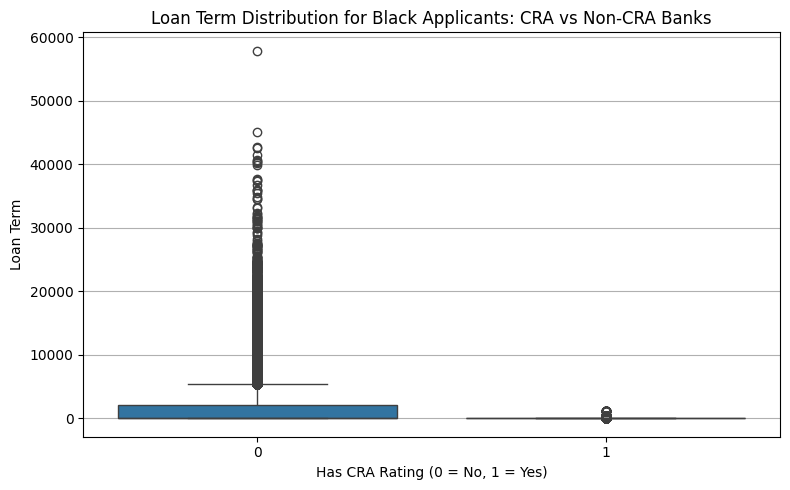

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_2021_black = df_model[
    (df_model['race_ncrc_sub'] == 'Black or African American')
]


plt.figure(figsize=(8, 5))
sns.boxplot(x='has_cra_rating', y='loan_term', data=df_2021_black)
plt.title("Loan Term Distribution for Black Applicants: CRA vs Non-CRA Banks")
plt.xlabel("Has CRA Rating (0 = No, 1 = Yes)")
plt.ylabel("Loan Term")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
df_sub = df_model[df_model['race_ncrc_sub'].isin(['White', 'Black or African American'])].copy()

In [ ]:
df_sub['race_ncrc_sub'] = df_sub['race_ncrc_sub'].astype('str')  # 先转成字符串
df_sub['race_ncrc_sub'] = df_sub['race_ncrc_sub'].astype('category')  # 再变回干净的 category


In [ ]:
df_sub.head()

,approved,has_cra_rating,tract_to_msa_income_pct,loan_amount,loan_term,open_end_line_of_credit,balloon_payment,interest_only_payment,applicant_sex,race_ncrc_sub,loan_type,loan_purpose,derived_msa_md,low_income,cra_low_income
1,1,0,99.0,455000,360.0,0.0,0.0,0.0,1,White,1,1,22744,0,0
2,1,0,142.0,445000,360.0,0.0,0.0,0.0,1,White,1,1,12060,0,0
7,1,0,103.0,235000,360.0,0.0,0.0,0.0,1,Black or African American,1,1,99999,0,0
8,1,0,118.0,425000,360.0,0.0,0.0,0.0,1,White,2,1,15980,0,0
9,1,0,103.0,295000,360.0,0.0,0.0,0.0,2,White,3,1,42340,0,0


In [ ]:
print(df_sub['race_ncrc_sub'].unique())

['White', 'Black or African American']
Categories (2, object): ['Black or African American', 'White']


In [ ]:

print(df_sub.nunique())

# race × CRA
pd.crosstab(df_sub['race_ncrc_sub'], df_sub['has_cra_rating'])


approved                       2
has_cra_rating                 2
tract_to_msa_income_pct     2836
loan_amount                  400
loan_term                  37826
open_end_line_of_credit        2
balloon_payment                2
interest_only_payment          2
applicant_sex                  4
race_ncrc_sub                  2
loan_type                      4
loan_purpose                   6
derived_msa_md                90
low_income                     2
cra_low_income                 2
dtype: int64


has_cra_rating,0,1
race_ncrc_sub,,
Black or African American,116840,24673
White,146792,117364


In [ ]:
for col in df_sub.columns:
    if df_sub[col].nunique() <= 1:
        df_sub.drop(columns=[col], inplace=True)


In [ ]:
formula = (
    'approved ~ C(race_ncrc_sub) + has_cra_rating + C(race_ncrc_sub):has_cra_rating'
    ' + loan_amount + loan_term + low_income'
    ' + C(open_end_line_of_credit) + C(balloon_payment) + C(interest_only_payment)'
    ' + C(applicant_sex)'
    ' + C(loan_type) + C(loan_purpose) + C(derived_msa_md)'
)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit


X = pd.get_dummies(df_sub[[
    'race_ncrc_sub', 'has_cra_rating', 'loan_amount', 'loan_term', 'low_income',
    'open_end_line_of_credit', 'balloon_payment', 'interest_only_payment',
    'applicant_sex', 'loan_type', 'loan_purpose', 'derived_msa_md'
]], drop_first=True).astype(float)


X = X.loc[:, X.nunique() > 1]


X = sm.add_constant(X)

y = df_sub['approved'].astype(float)


Xy = pd.concat([X, y], axis=1).dropna()
X = Xy.drop(columns='approved')
y = Xy['approved']

model = Logit(y, X).fit(method="newton", maxiter=100, disp=True)
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.364670
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               approved   No. Observations:               203229
Model:                          Logit   Df Residuals:                   203120
Method:                           MLE   Df Model:                          108
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.2192
Time:                        03:26:03   Log-Likelihood:                -74112.
converged:                       True   LL-Null:                       -94917.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.5643      0.709     -9.257      0.000      -7.954  

In [ ]:
df_sub["is_black"] = (df_sub["race_ncrc_sub"] == "Black or African American").astype(int)
df_sub["black_x_cra"] = df_sub["is_black"] * df_sub["has_cra_rating"]

In [ ]:
X = pd.get_dummies(df_sub[[
    'has_cra_rating', 'loan_amount', 'loan_term', 'low_income',
    'open_end_line_of_credit', 'balloon_payment', 'interest_only_payment',
    'applicant_sex', 'loan_type', 'loan_purpose', 'derived_msa_md'
]], drop_first=True).astype(float)

X["is_black"] = df_sub["is_black"]
X["black_x_cra"] = df_sub["black_x_cra"]

# 继续去掉无用列、加常数、拟合
X = X.loc[:, X.nunique() > 1]
X = sm.add_constant(X)
y = df_sub["approved"].astype(float)
Xy = pd.concat([X, y], axis=1).dropna()
X = Xy.drop(columns="approved")
y = Xy["approved"]

model = Logit(y, X).fit(method="newton", maxiter=100, disp=True)
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.363988
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               approved   No. Observations:               203229
Model:                          Logit   Df Residuals:                   203119
Method:                           MLE   Df Model:                          109
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.2207
Time:                        03:31:55   Log-Likelihood:                -73973.
converged:                       True   LL-Null:                       -94917.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.1360      0.709     -8.655      0.000      -7.525  

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

# df_model
df_model['is_black'] = (df_model['race_ncrc_sub'] == 'Black or African American').astype(int)
df_model['black_x_cra'] = df_model['is_black'] * df_model['has_cra_rating']

# Step 2: dummy
X = pd.get_dummies(df_model[[
    'has_cra_rating', 'loan_amount', 'loan_term', 'low_income',
    'open_end_line_of_credit', 'balloon_payment', 'interest_only_payment',
    'applicant_sex', 'loan_type', 'loan_purpose', 'derived_msa_md'
]], drop_first=True).astype(float)

# Step 3:
X['is_black'] = df_model['is_black']
X['black_x_cra'] = df_model['black_x_cra']

# Step 4:
X = sm.add_constant(X)

# Step 5:
y = df_model['approved'].astype(float)
Xy = pd.concat([X, y], axis=1).dropna()
X = Xy.drop(columns='approved')
y = Xy['approved']

# Step 6:
model = Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.451671
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               approved   No. Observations:               582209
Model:                          Logit   Df Residuals:                   582097
Method:                           MLE   Df Model:                          111
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.1357
Time:                        03:35:02   Log-Likelihood:            -2.6297e+05
converged:                       True   LL-Null:                   -3.0427e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.9460      0.149    -19.794      0.000      -3.238   

# Target 2: Interest Rate Disparity across Races

---
also interacting with approval rate with control of sex and loan_amount



In [ ]:
import pandas as pd
import requests
import io
from scipy.stats import ttest_ind

In [ ]:
# Step 1: Load APOR reference data from Google Drive
file_id = '1t5Kb4YmuoytbL5M2SRHGqNmpzEZxqzaq'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(download_url)
apor = pd.read_csv(io.StringIO(response.text))

# Clean APOR data to ensure expected columns: loan_term, apor_rate, activity_year
apor.columns = ['loan_term', 'apor_rate', 'activity_year']
apor['loan_term'] = pd.to_numeric(apor['loan_term'], errors='coerce')
apor['apor_rate'] = pd.to_numeric(apor['apor_rate'], errors='coerce')
apor['activity_year'] = pd.to_numeric(apor['activity_year'], errors='coerce')

# Step 2: Ensure df_merged exists and has necessary columns
df_merged['activity_year'] = pd.to_numeric(df_merged['activity_year'], errors='coerce')
df_merged['loan_term'] = pd.to_numeric(df_merged['loan_term'], errors='coerce')
df_merged['interest_rate'] = pd.to_numeric(df_merged['interest_rate'], errors='coerce')

# Step 3: Merge APOR rates into main dataset
df_merged_new = df_merged.merge(
    apor,
    how='left',
    on=['activity_year', 'loan_term']
)

# Step 4: Calculate interest spread
df_merged_new['apor_rate'] = pd.to_numeric(df_merged_new['apor_rate'], errors='coerce')
df_merged_new['interest_spread'] = df_merged_new['interest_rate'] - df_merged_new['apor_rate']

# Step 5: Filter rows with valid spread
df_spread = df_merged_new.dropna(subset=['interest_spread'])

# Step 6: Group by CRA status and print mean spread
spread_by_cra = df_spread.groupby('has_cra_rating')['interest_spread'].mean()
print(" Mean Interest Spread by CRA Status:\n", spread_by_cra)

# Step 7: Perform t-test
from scipy.stats import ttest_ind

cra_spread = df_spread[df_spread['has_cra_rating'] == 1]['interest_spread']
non_cra_spread = df_spread[df_spread['has_cra_rating'] == 0]['interest_spread']

# T-test
t_stat, p_val = ttest_ind(cra_spread, non_cra_spread, equal_var=False)

print(f"\n T-test Result: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

📊 Mean Interest Spread by CRA Status:
 has_cra_rating
0    24.072303
1    53.868299
Name: interest_spread, dtype: float64

📈 T-test Result: t-statistic = 28.8975, p-value = 0.0000


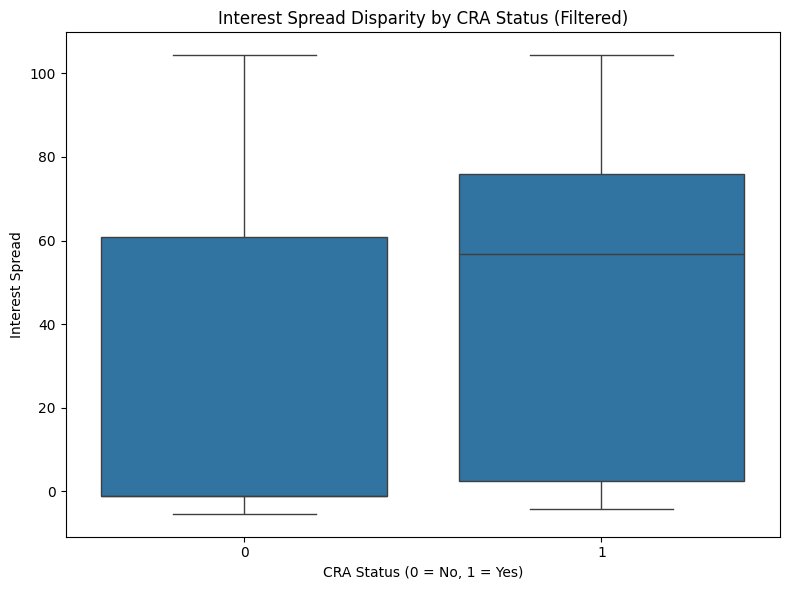

In [ ]:
# Step 5: Visualize using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to remove extreme outliers (top 1%)
upper_threshold = df_valid['interest_spread'].quantile(0.99)
df_trimmed = df_valid[df_valid['interest_spread'] < upper_threshold]

plt.figure(figsize=(8, 6))
sns.boxplot(x='has_cra_rating', y='interest_spread', data=df_trimmed)
plt.title('Interest Spread Disparity by CRA Status (Filtered)')
plt.xlabel('CRA Status (0 = No, 1 = Yes)')
plt.ylabel('Interest Spread')
plt.tight_layout()
plt.show()

Mean Interest Spread by CRA Status and Loan Approval:

approved                0          1
has_cra_rating                      
0               16.871479  33.704229
1               55.647627  52.323186


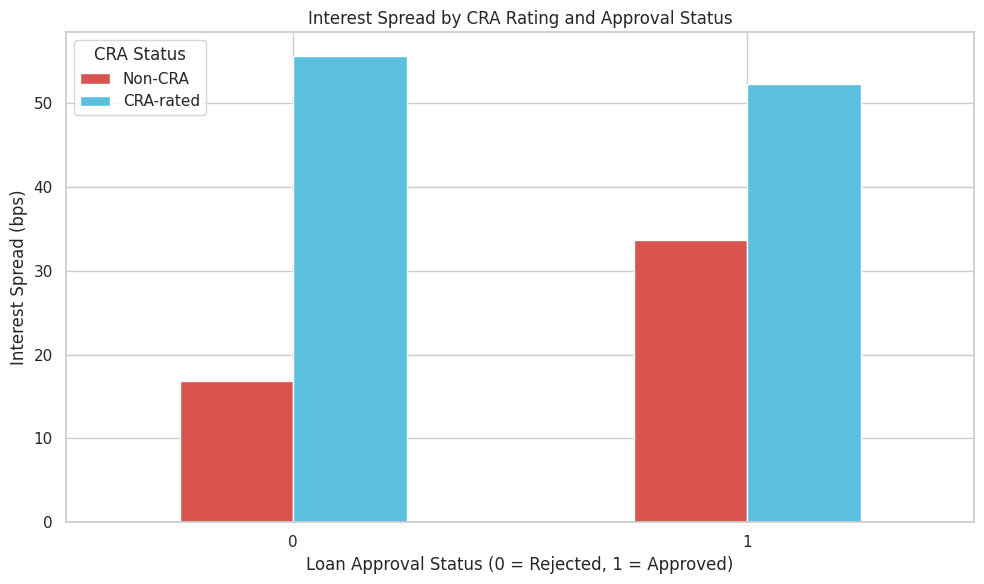

In [ ]:
## ------ Interest Spread by CRA Status and Loan Approval -----------##

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for valid spread, CRA, and approval status
df_valid2 = df_spread.dropna(subset=['interest_spread', 'has_cra_rating', 'approved'])

# Step 2: Group by CRA rating and approval status, calculate mean interest spread
spread_by_cra_approval = df_valid2.groupby(['has_cra_rating', 'approved'])['interest_spread'].mean().unstack()

# Step 3: Print results
print("Mean Interest Spread by CRA Status and Loan Approval:\n")
print(spread_by_cra_approval)

# Step 4: Plot the comparison
spread_by_cra_approval.T.plot(kind='bar', figsize=(10, 6), color=['#D9534F', '#5BC0DE'])
plt.title('Interest Spread by CRA Rating and Approval Status')
plt.xlabel('Loan Approval Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Interest Spread (bps)')
plt.xticks(rotation=0)
plt.legend(title='CRA Status', labels=['Non-CRA', 'CRA-rated'])
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

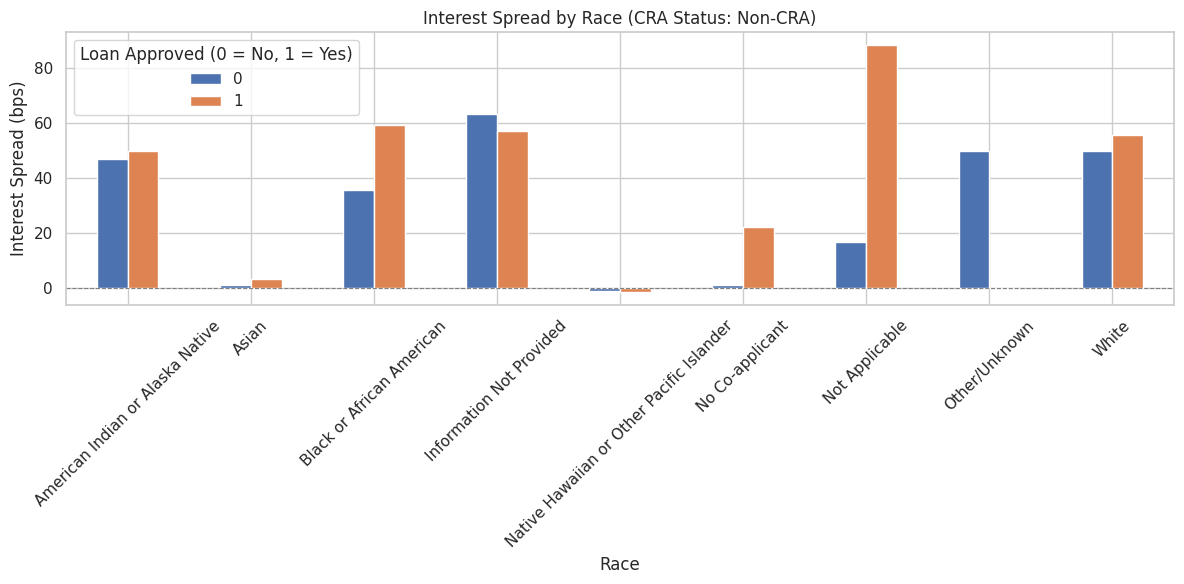

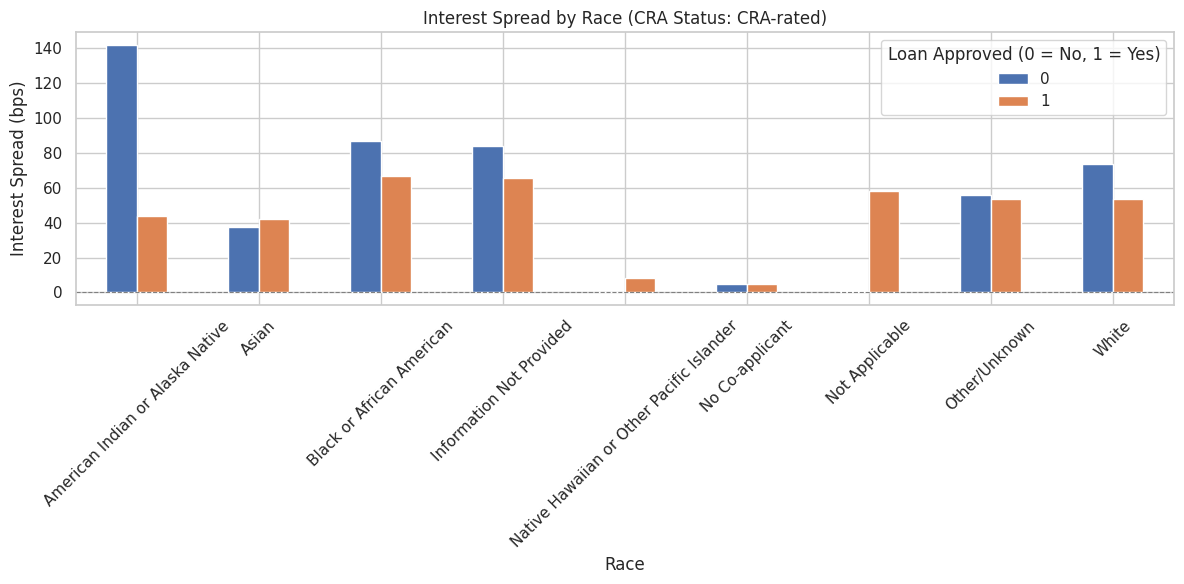

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter valid rows
df_valid3 = df_spread.dropna(subset=['interest_spread', 'has_cra_rating', 'approved', 'race_ncrc_major'])

# Step 2: Group by race, CRA rating, and approval, then calculate mean spread
spread_by_race_cra_approval = df_valid3.groupby(['race_ncrc_major', 'has_cra_rating', 'approved'])['interest_spread'].mean().reset_index()

# Step 3: Pivot table for cleaner plotting
pivot_table = spread_by_race_cra_approval.pivot_table(
    index='race_ncrc_major',
    columns=['has_cra_rating', 'approved'],
    values='interest_spread'
)

# Step 4: Plot for each CRA status (0 = non-CRA, 1 = CRA-rated)
for cra_status in [0, 1]:
    subset = pivot_table[cra_status]
    subset.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Interest Spread by Race (CRA Status: {"CRA-rated" if cra_status else "Non-CRA"})')
    plt.xlabel('Race')
    plt.ylabel('Interest Spread (bps)')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Approved (0 = No, 1 = Yes)')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    plt.show()


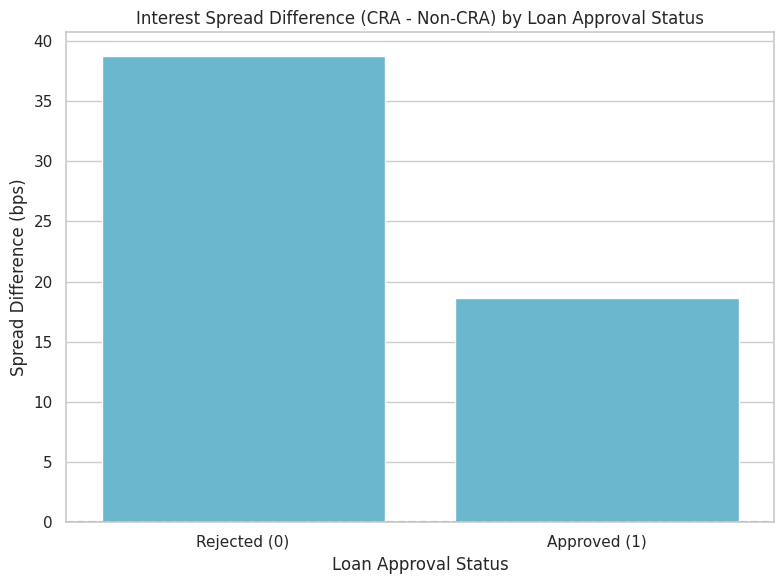


CRA - Non-CRA Interest Spread Differences:
  Approval Status  CRA - Non-CRA Spread Difference (bps)
0    Rejected (0)                              38.776149
1    Approved (1)                              18.618957


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter valid rows
df_valid = df_spread.dropna(subset=['interest_spread', 'has_cra_rating', 'approved'])

# Step 2: Group by CRA and approval status, calculate mean
spread_grouped = df_valid.groupby(['approved', 'has_cra_rating'])['interest_spread'].mean().unstack()

# Step 3: Calculate CRA - non-CRA difference
spread_diff = spread_grouped[1] - spread_grouped[0]  # CRA - Non-CRA

# Step 4: Convert to DataFrame for plotting
spread_diff_df = pd.DataFrame({
    'Approval Status': ['Rejected (0)', 'Approved (1)'],
    'CRA - Non-CRA Spread Difference (bps)': spread_diff.values
})

# Step 5: Visualize
plt.figure(figsize=(8,6))
sns.barplot(x='Approval Status', y='CRA - Non-CRA Spread Difference (bps)', data=spread_diff_df, color='#5BC0DE')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Interest Spread Difference (CRA - Non-CRA) by Loan Approval Status')
plt.ylabel('Spread Difference (bps)')
plt.xlabel('Loan Approval Status')
plt.tight_layout()
plt.show()

# Step 6: Print results
print("\nCRA - Non-CRA Interest Spread Differences:")
print(spread_diff_df)

<ipython-input-73-4dc691913a7b>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




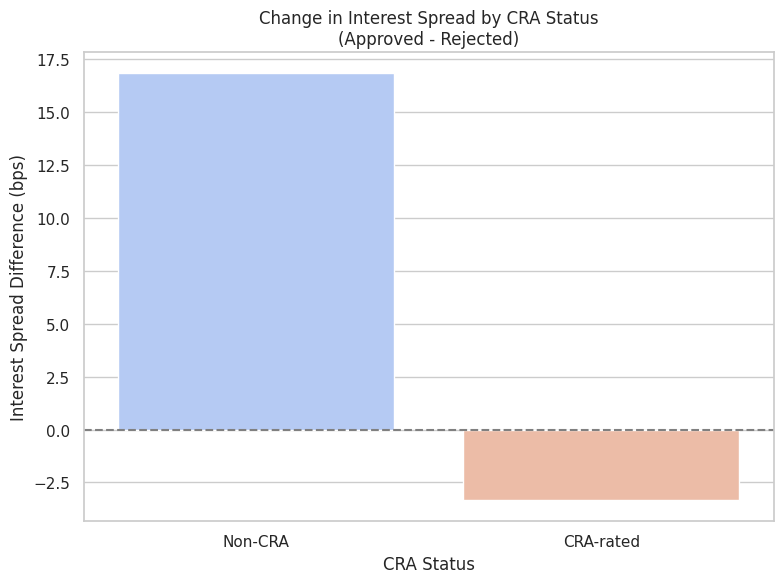

,CRA Status,Spread Difference (Approved - Rejected)
0,Non-CRA,16.832750
1,CRA-rated,-3.324441


In [ ]:
# Create the spread matrix manually again for safe comparison
data = {
    'interest_spread': [
        16.871479, 55.647627, 33.704229, 52.323186
    ],
    'has_cra_rating': [0, 1, 0, 1],
    'approved': [0, 0, 1, 1]
}

df_diff = pd.DataFrame(data)

# Calculate within-group differences: Approved - Rejected, separately for CRA and Non-CRA
non_cra_diff = df_diff[(df_diff['has_cra_rating'] == 0) & (df_diff['approved'] == 1)]['interest_spread'].values[0] - \
               df_diff[(df_diff['has_cra_rating'] == 0) & (df_diff['approved'] == 0)]['interest_spread'].values[0]

cra_diff = df_diff[(df_diff['has_cra_rating'] == 1) & (df_diff['approved'] == 1)]['interest_spread'].values[0] - \
           df_diff[(df_diff['has_cra_rating'] == 1) & (df_diff['approved'] == 0)]['interest_spread'].values[0]

# Create summary DataFrame for visualization
diff_df = pd.DataFrame({
    'CRA Status': ['Non-CRA', 'CRA-rated'],
    'Spread Difference (Approved - Rejected)': [non_cra_diff, cra_diff]
})

import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=diff_df, x='CRA Status', y='Spread Difference (Approved - Rejected)', palette='coolwarm')
plt.title('Change in Interest Spread by CRA Status\n(Approved - Rejected)')
plt.ylabel('Interest Spread Difference (bps)')
plt.axhline(0, linestyle='--', color='gray')
plt.tight_layout()
plt.show()

diff_df



Mean Interest Spread by Race and CRA Status:
 has_cra_rating                                     0           1
race_ncrc_major                                                 
American Indian or Alaska Native           48.406160  100.514331
Asian                                       2.225418   39.942097
Black or African American                  44.139603   77.228228
Information Not Provided                   60.568212   74.684037
Native Hawaiian or Other Pacific Islander  -1.097922    0.511163
No Co-applicant                             9.095771    5.033439
Not Applicable                             61.125932    4.009662
Other/Unknown                              50.054333   55.032596
White                                      53.554115   60.808516


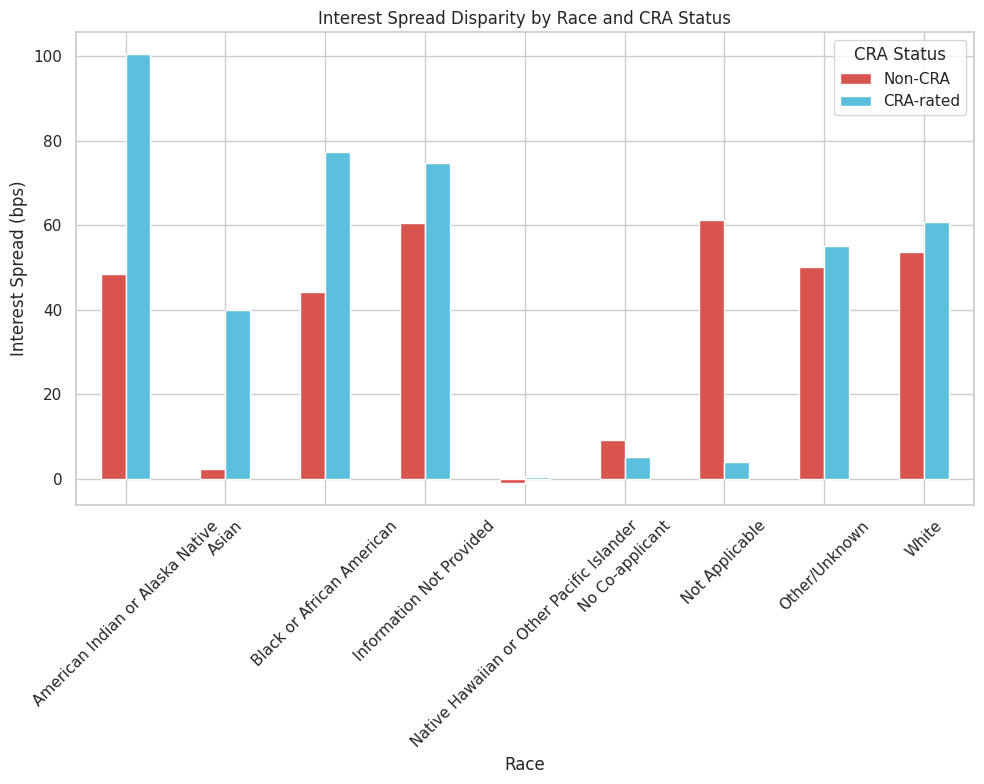

In [ ]:
# Step 1: Filter valid interest spread entries
df_valid = df_spread.dropna(subset=['interest_spread', 'race_ncrc_major'])

# Step 2: Group by race and CRA status, then calculate mean interest spread
spread_by_race = df_valid.groupby(['race_ncrc_major', 'has_cra_rating'])['interest_spread'].mean().unstack()

# Step 3: Display results
print("\nMean Interest Spread by Race and CRA Status:\n", spread_by_race)

# Step 4: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

spread_by_race.plot(kind='bar', figsize=(10,6), color=['#D9534F', '#5BC0DE'])
plt.title('Interest Spread Disparity by Race and CRA Status')
plt.xlabel('Race')
plt.ylabel('Interest Spread (bps)')
plt.xticks(rotation=45)
plt.legend(title='CRA Status', labels=['Non-CRA', 'CRA-rated'])
plt.tight_layout()
plt.show()


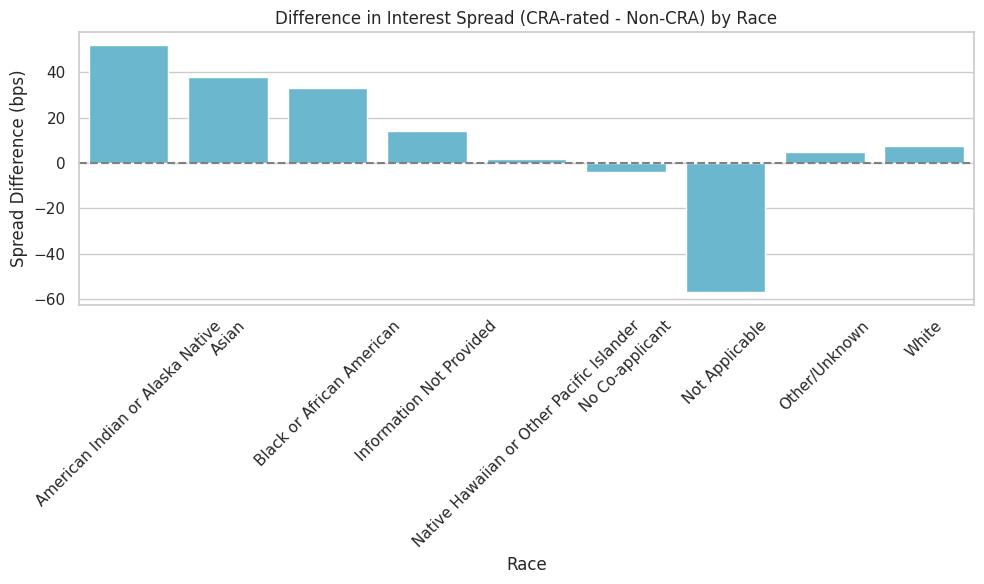

In [ ]:
# Step 5: Calculate difference in interest spread (CRA-rated - Non-CRA)
spread_by_race['Difference'] = spread_by_race[1] - spread_by_race[0]

# Step 6: Plot the difference
plt.figure(figsize=(10, 6))
sns.barplot(x=spread_by_race.index, y=spread_by_race['Difference'], color='#5BC0DE')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Difference in Interest Spread (CRA-rated - Non-CRA) by Race')
plt.xlabel('Race')
plt.ylabel('Spread Difference (bps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Mean Interest Spread by Race, CRA Status, and Approval Status:
 approved                                                           0  \
race_ncrc_major                           has_cra_rating               
American Indian or Alaska Native          0                47.076993   
                                          1               141.895746   
Asian                                     0                 1.146668   
                                          1                37.331714   
Black or African American                 0                35.842180   
                                          1                87.019121   
Information Not Provided                  0                63.575298   
                                          1                84.142028   
Native Hawaiian or Other Pacific Islander 0                -0.989179   
                                          1                -0.036659   
No Co-applicant                           0                 1.326859   

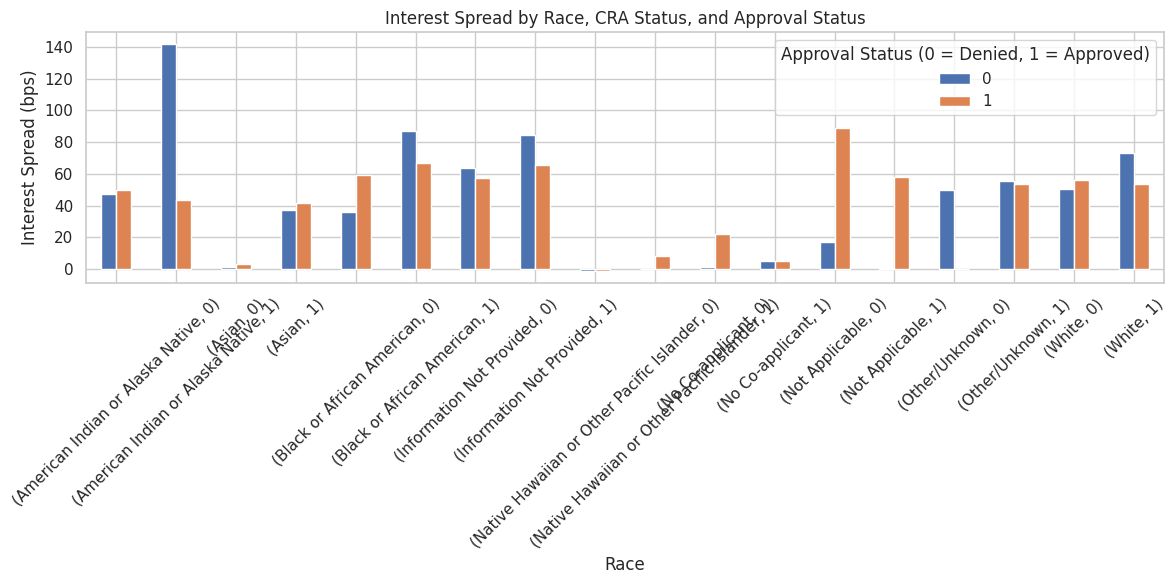

In [ ]:
# Step 1: Filter valid rows
df_valid = df_spread.dropna(subset=['interest_spread', 'race_ncrc_major', 'approved'])

# Step 2: Group by race, CRA, and approval status → calculate mean interest spread
spread_disparity = df_valid.groupby(['race_ncrc_major', 'has_cra_rating', 'approved'])['interest_spread'].mean().unstack()

# Step 3: Show table of results
print("\nMean Interest Spread by Race, CRA Status, and Approval Status:\n", spread_disparity)

# Step 4: Plot mean interest spread
spread_disparity.plot(kind='bar', figsize=(12, 6))
plt.title('Interest Spread by Race, CRA Status, and Approval Status')
plt.xlabel('Race')
plt.ylabel('Interest Spread (bps)')
plt.xticks(rotation=45)
plt.legend(title='Approval Status (0 = Denied, 1 = Approved)')
plt.tight_layout()
plt.show()


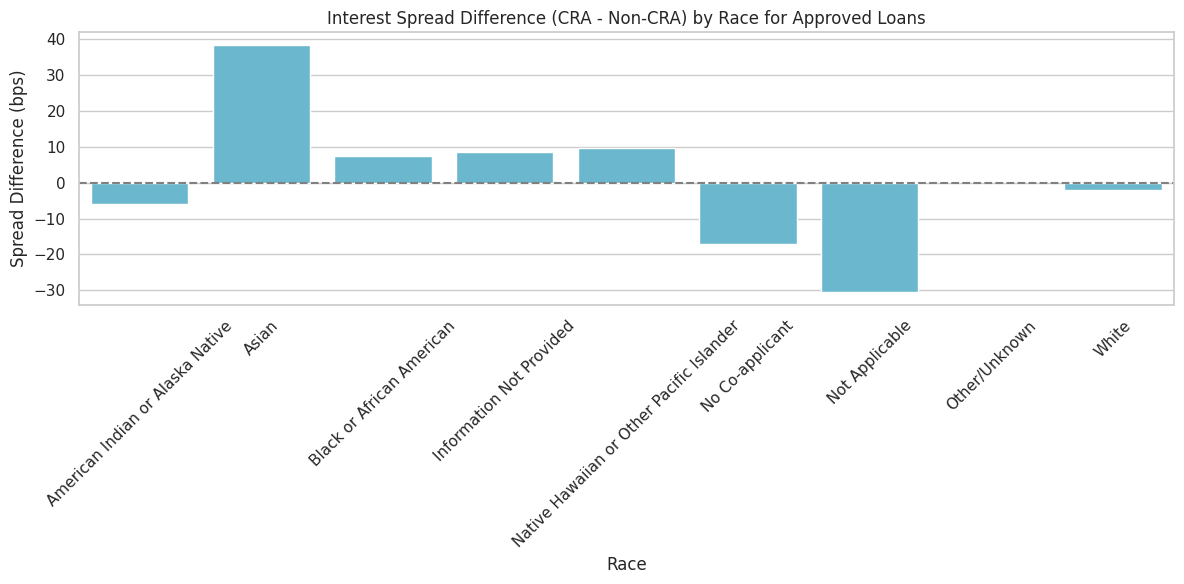

In [ ]:

#---------- plot diff across races between CRA & non-CRA banks when loans are approved --------------------#
# Step 1: Filter approved loans only
df_approved = df_valid[df_valid['approved'] == 1]

# Step 2: Group by race and CRA status, calculate mean spread
spread_disparity = df_approved.groupby(['race_ncrc_major', 'has_cra_rating'])['interest_spread'].mean().unstack()

# Step 3: Calculate CRA - Non-CRA spread difference
spread_diff = spread_disparity[1] - spread_disparity[0]
spread_diff = spread_diff.reset_index()
spread_diff.columns = ['Race', 'Spread Difference']

# Step 4: Plot the difference
plt.figure(figsize=(12, 6))
sns.barplot(x='Race', y='Spread Difference', data=spread_diff, color='#5BC0DE')
plt.title('Interest Spread Difference (CRA - Non-CRA) by Race for Approved Loans')
plt.xlabel('Race')
plt.ylabel('Spread Difference (bps)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Get valid data for analysis
df_valid = df_spread.dropna(subset=['interest_spread', 'derived_race', 'approved'])

race_groups = df_valid['derived_race'].unique()

print("\nT-tests for interest spread differences by race (CRA vs Non-CRA), stratified by approval status:\n")

for race in race_groups:
    for approval_status in [0, 1]:
        cra_group = df_valid[(df_valid['derived_race'] == race) &
                             (df_valid['has_cra_rating'] == 1) &
                             (df_valid['approved'] == approval_status)]['interest_spread']

        non_cra_group = df_valid[(df_valid['derived_race'] == race) &
                                 (df_valid['has_cra_rating'] == 0) &
                                 (df_valid['approved'] == approval_status)]['interest_spread']

        if len(cra_group) > 1 and len(non_cra_group) > 1:
            t_stat, p_val = ttest_ind(cra_group, non_cra_group, equal_var=False)
            print(f"Race: {race}, Approval: {approval_status} | t-stat: {t_stat:.3f}, p-val: {p_val:.3f}")
        else:
            print(f"Race: {race}, Approval: {approval_status} | Not enough data for t-test.")




T-tests for interest spread differences by race (CRA vs Non-CRA), stratified by approval status:

Race: Race Not Available, Approval: 0 | t-stat: 10.162, p-val: 0.000
Race: Race Not Available, Approval: 1 | t-stat: 41.398, p-val: 0.000
Race: White, Approval: 0 | t-stat: 14.214, p-val: 0.000
Race: White, Approval: 1 | t-stat: 104.887, p-val: 0.000
Race: Black or African American, Approval: 0 | t-stat: 5.537, p-val: 0.000
Race: Black or African American, Approval: 1 | t-stat: 67.283, p-val: 0.000
Race: American Indian or Alaska Native, Approval: 0 | t-stat: 4.117, p-val: 0.000
Race: American Indian or Alaska Native, Approval: 1 | t-stat: 12.090, p-val: 0.000
Race: Joint, Approval: 0 | t-stat: 28.415, p-val: 0.000
Race: Joint, Approval: 1 | t-stat: 21.697, p-val: 0.000
Race: Asian, Approval: 0 | t-stat: 28.957, p-val: 0.000
Race: Asian, Approval: 1 | t-stat: 21.680, p-val: 0.000
Race: 2 or more minority races, Approval: 0 | t-stat: 3.278, p-val: 0.001
Race: 2 or more minority races, Appr

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb

# Step 1: loading data
df_merged['interest_spread'] = df_spread['interest_spread']

# Step 2: data clean
df = df_merged.dropna(subset=[
    'interest_spread', 'has_cra_rating', 'approved', 'loan_amount',
    'applicant_sex', 'co_applicant_sex', 'derived_race',
    'loan_type', 'loan_purpose', 'applicant_credit_score_type',
    'tract_to_msa_income_pct', 'state_code'
]).copy()

# mapping
sex_map = {'1': 'Male', '2': 'Female', '3': 'Joint', '4': 'Not Applicable'}
df['applicant_sex'] = df['applicant_sex'].astype(str).map(sex_map).fillna('Unknown')
df['co_applicant_sex'] = df['co_applicant_sex'].astype(str).map(sex_map).fillna('Unknown')
df['derived_race'] = df['derived_race'].astype(str).replace('', 'Unknown')
df['loan_type'] = df['loan_type'].astype(str)
df['loan_purpose'] = df['loan_purpose'].astype(str)
df['state_code'] = df['state_code'].astype(str)
df['applicant_credit_score_type'] = df['applicant_credit_score_type'].astype(str)
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')
df['tract_to_msa_income_pct'] = pd.to_numeric(df['tract_to_msa_income_pct'], errors='coerce')
df['log_loan_amount'] = np.log1p(df['loan_amount'])

# Step 3: OLS regression
formula = (
    'interest_spread ~ has_cra_rating * C(derived_race) + '
    'approved + log_loan_amount + C(applicant_sex) + C(co_applicant_sex) + '
    'C(loan_type) + C(loan_purpose) + C(applicant_credit_score_type) + '
    'tract_to_msa_income_pct + C(state_code)'
)
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        interest_spread   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     208.5
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        17:44:57   Log-Likelihood:            -4.0024e+06
No. Observations:              593033   AIC:                         8.005e+06
Df Residuals:                  592974   BIC:                         8.006e+06
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

100%|===================| 592900/593033 [35:29<00:00]       

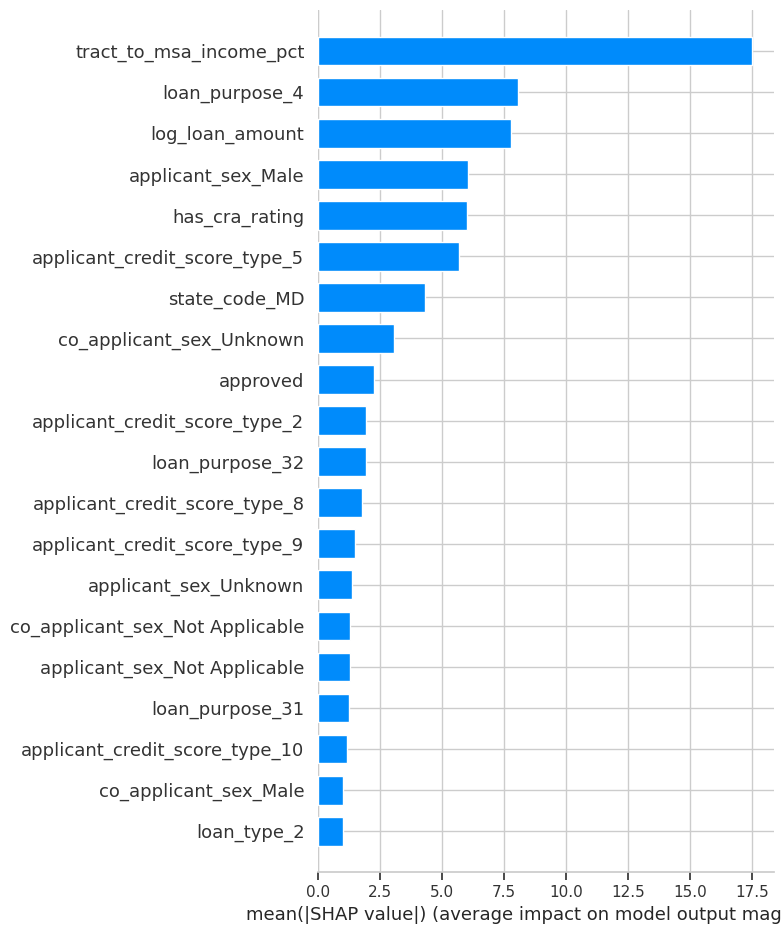

,feature,importance
45,state_code_MD,0.344080
0,has_cra_rating,0.183851
3,tract_to_msa_income_pct,0.126291
13,applicant_sex_Male,0.039943
43,state_code_FL,0.039279
37,applicant_credit_score_type_5,0.038629
2,log_loan_amount,0.026637
34,applicant_credit_score_type_2,0.023228
6,derived_race_Black or African American,0.021411
29,applicant_credit_score_type_11,0.014698


In [ ]:
# Step 4:  XAI ( XGBoost + SHAP)
df_xai = df.copy()
y = df_xai['interest_spread']

# Step 4.1: One-hot encoding
X = df_xai[[
    'has_cra_rating', 'approved', 'log_loan_amount', 'derived_race',
    'applicant_sex', 'co_applicant_sex', 'loan_type', 'loan_purpose',
    'applicant_credit_score_type', 'tract_to_msa_income_pct', 'state_code'
]]
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4.2: transform to float64
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')
X_encoded = X_encoded.astype('float64')

# Step 4.3: XGBoost modeling
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
xgb_model.fit(X_encoded, y)

# Step 4.4: SHAP analysis
explainer = shap.Explainer(xgb_model, X_encoded)
shap_values = explainer(X_encoded)

# Step 5: SHAP plot
shap.summary_plot(shap_values, X_encoded, plot_type="bar")

# Step 6: importance analyssi
importance_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df

